```
ID: 0710018
Name: 張宸愷
```

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report, confusion_matrix

# read wheat seeds dataset
seeds = pd.read_table("data/seeds_dataset.txt",
                      header=None, sep='\t+', engine='python')
# read ionosphere dataset
ionosphere = pd.read_csv("data/ionosphere.data", header=None, sep=',')

seeds_orig = seeds.to_numpy()
ionosphere_orig = ionosphere.to_numpy()

np.random.shuffle(seeds_orig)
np.random.shuffle(ionosphere_orig)

# X_seeds = scale(seeds_orig[:, 0:-1], axis=0)
# X_iono = scale(ionosphere_orig[:, 0:-1], axis=0)


def r2np(r: dict, clss: list) -> np.ndarray:
    o = np.zeros((len(clss),  3), dtype=np.float64)
    for i, c in enumerate(clss):
        c = str(c)
        o[i] = [r[c]["precision"], r[c]["recall"], r["accuracy"]]

    return o
    

In [162]:
# K-means clustering


class Kmeans:

    centers = None

    def __init__(self, K) -> None:
        self.K = K

    def predict(self, X: np.ndarray) -> np.ndarray:
        feature_num = X.shape[1]
        low = [X[:, i].min() for i in range(feature_num)]
        high = [X[:, i].max() for i in range(feature_num)]
        self.centers = np.zeros((self.K, feature_num), dtype=np.float64)
        for a in range(self.K):
            # generate uniform distribution for every feature with
            # the interval being [feature.min(), feature.max()]
            self.centers[a] = [np.random.uniform(
                low=low[i], high=high[i]) for i in range(feature_num)]
        dis = np.ones((self.K, feature_num), dtype=np.float64)
        while np.sum(dis) > 1e-7:  # loop until centers don't change
            assign = self.__assign(X)  # get new assignment
            new_c = self.__update(X, assign)  # get new center

            # get summation of center difference
            dis = np.sum(np.abs(new_c - self.centers))
            self.centers = new_c  # assing new center

        return assign

    def __update(self, X, assign):
        new_cen = np.zeros((self.K, X.shape[1]))
        for i in range(self.K):
            mask: np.ndarray = np.where(
                assign == i, 1, 0)  # get points in group i
            ss = np.moveaxis(X, 0, -1) * mask  # transpose X to broadcast mask
            ss = np.moveaxis(ss, 0, -1)  # transpose X back
            div = np.sum(mask)  # num samples in mask
            new_cen[i] = (np.sum(ss, axis=0) / div)  # get new center
        return new_cen

    def __assign(self, X) -> np.ndarray:
        dis = np.zeros((X.shape[0], self.K), dtype=np.float64)
        for i in range(self.K):
            # calculate Euclidean distance with center
            t = np.sum((X - self.centers[i])**2, axis=1).astype(np.float64)
            dis[:, i] = np.sqrt(t)
        return dis.argmin(axis=1)  # decide which set it belongs to


km = Kmeans(3)
p = km.predict(seeds_orig[:, 0:-1])

mm = np.zeros((3, 3), dtype=np.int64)
for i in range(3):
    for j in range(3):
        label_i = np.argwhere(p == i)
        # print(a)
        a = seeds_orig[:, -1][label_i] == j+1
        mm[i, j] = np.count_nonzero(a)

# print(mm)
trans = np.argmax(mm, axis=1)
# print(trans)

pred = np.array([trans[x]+1 for x in p])

r = classification_report(
    seeds_orig[:, -1], pred, labels=[1, 2, 3], output_dict=True)
confm = confusion_matrix(seeds_orig[:, -1], pred)

print("metrices:\n")
df = pd.DataFrame(index=[1, 2, 3], columns=[
                  "precision", "recall", "accuracy"], data=r2np(r, [1, 2, 3]))

print(df)
print()
print("confusion matrix:\n")
df = pd.DataFrame(index=[str(i)+" (true)" for i in range(3)],
                  columns=[str(i) + " (pred)" for i in range(3)], data=confm)
print(df)


metrices:

   precision    recall  accuracy
1   0.833333  0.857143  0.895238
2   0.983607  0.857143  0.895238
3   0.883117  0.971429  0.895238

confusion matrix:

          0 (pred)  1 (pred)  2 (pred)
0 (true)        60         1         9
1 (true)        10        60         0
2 (true)         2         0        68


In [ ]:
# SVM



# Questions
## K-means clustering
> Choose two features to execute your K-means function and draw a scatter plot with the computed centers and the predicted label for each instance. - 10%



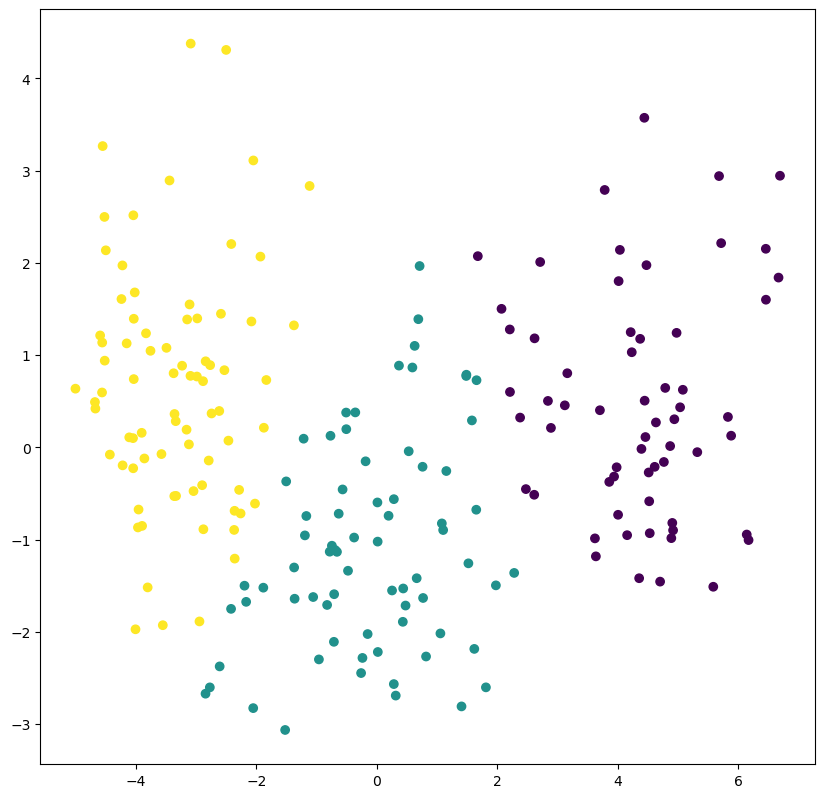

In [163]:
from sklearn.decomposition import PCA


pc = PCA(n_components=2)
X = pc.fit_transform(seeds_orig[:,0:-1])

km = Kmeans(K=3)
pred = km.predict(X)

fig = plt.figure(figsize=(10,10), dpi=100)

_ = plt.scatter(X[:,0], X[:,1], c=pred)


## Support Vector Machine
> Show the average performance of K-fold cross-validation of parameter search in tables for each kernel. - 10%
